# American Sign Language Detection

#### In this project, I have created a model that will predict the hand signs based on the American Sign Language(ASL) standards.

The dataset is taken from Kaggle and it has a total of <b>36 classes</b> including images of the numbers from 0-9 and all the English alphabets from A-Z. It has around <b>2515 images in total and around 70 images</b> in each class. <br>
I have split the dataset into training and testing sets where there are 2012 images for training (55 images in each class) and 503 images for testing (14 images in each class).<br>

<br><b>Dataset Link: https://www.kaggle.com/datasets/ayuraj/asl-dataset


### Importing the required libraries

In [12]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

from tensorflow.keras.layers import MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.models import load_model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#### Setting the path of the training and testing dataset

In [14]:
train_path = "dataset/train"
test_path = "dataset/test"

### Performing data augmentation

Using ImageDataGenerator we rescale the images and and also artificially create different training and testing images through different ways of processing like shear and zoom. This introduces a sort of randomness in the dataset.

In [15]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range=0.2,
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range=0.2,
                                   zoom_range=0.2)

In [16]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [17]:
y_train = train_set.classes
y_test = test_set.classes

train_set.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

### Plotting sample images from the training dataset

In [18]:
label_names = ['0', '1', '2', '3', '4', '5', 
               '6', '7', '8', '9', 'A', 'B', 
               'C', 'D', 'E', 'F', 'G', 'H', 
               'I', 'J', 'K', 'L', 'M', 'N', 
               'O', 'P', 'Q', 'R', 'S', 'T', 
               'U', 'V', 'W', 'X', 'Y', 'Z']

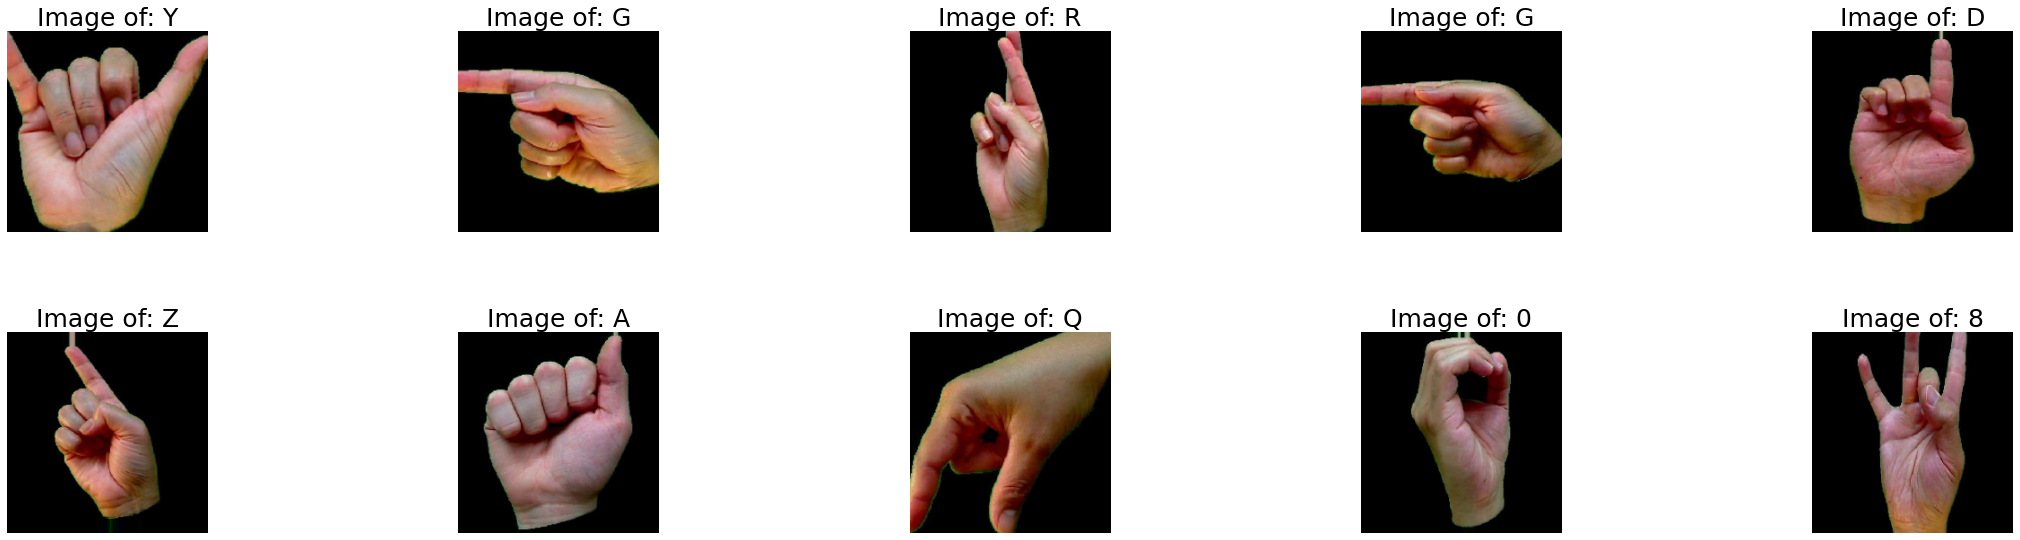

In [19]:
imgs, labels = next(iter(train_set))
counter = 1
for img, label in zip(imgs, labels):
    plt.subplot(5,5,counter)
    plt.subplots_adjust(right=5, top=5, wspace=0.5, hspace=0.5)
    value=np.argmax(label)
    labelname=label_names[value]
    plt.imshow(img)
    plt.title("Image of: "+labelname, fontdict={'fontsize': 25})
    counter+=1
    plt.axis("off")
    if(counter>10):
        break
    
plt.show()

# Creating the model

## InceptionV3 transfer learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a different task. So an already trained model on some other dataset is used and modified to fit the new task. <br>
Inception v3 is an image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. The model is the culmination of many ideas developed by multiple researchers over the years.<br>

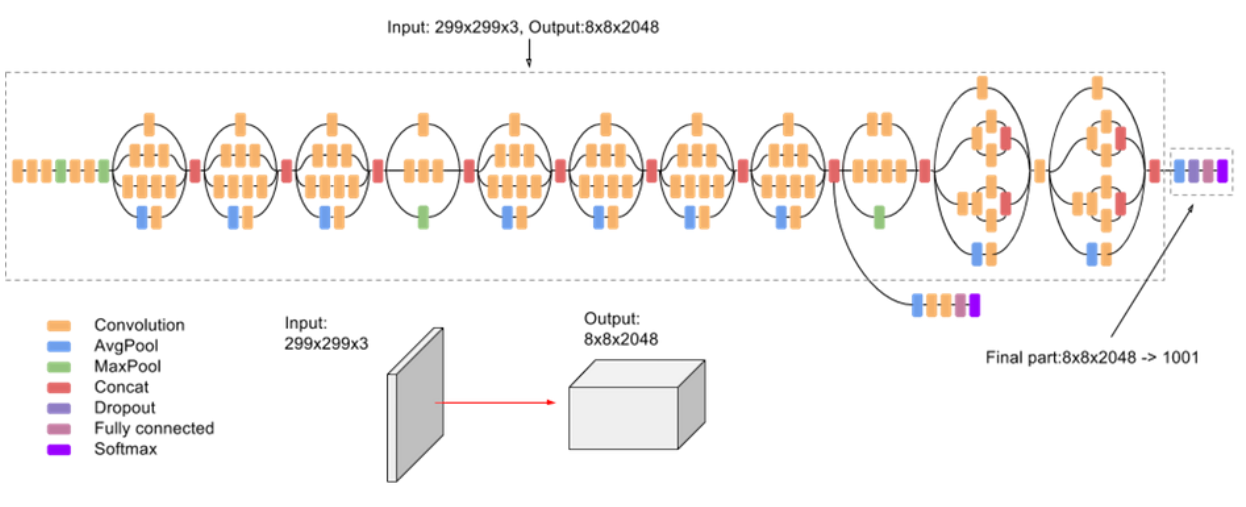

### Loading inceptionV3 as the base model

In [20]:
base_model = InceptionV3(input_shape=(224,224,3),
                        include_top=False,
                        weights = "imagenet")

87910968/87910968 [==============================] - 15s 0us/step


In [21]:
base_model.trainable = False

### Adding the base model and a few layers to our model

In [22]:
model = Sequential([
    base_model,
    MaxPooling2D(),
    Flatten(),
    Dense(36, activation="softmax")])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 36)                294948    
                                                                 
Total params: 22,097,732
Trainable params: 294,948
Non-trainable params: 21,802,784
_________________________________________________________________


### Compiling and fitting the model on the training dataset

In [24]:
model.compile(optimizer=Adam(learning_rate = 0.01),
              loss = CategoricalCrossentropy(),
              metrics = [CategoricalAccuracy()])

In [25]:
model.fit(train_set,
         validation_data = test_set,
         steps_per_epoch = 32,
         epochs = 32)

Epoch 1/32
10/32 [========>.....................] - ETA: 40s - loss: 87.3863 - categorical_accuracy: 0.0791

KeyboardInterrupt: 

### Plotting the Loss and Accuracy graphs

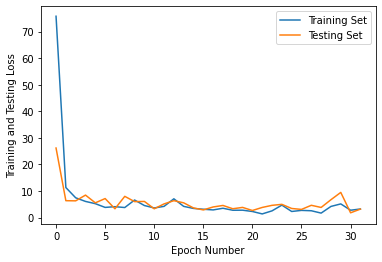

In [22]:
plt.xlabel('Epoch Number')
plt.ylabel('Training and Testing Loss')
plt.plot(model.history.history['loss'], label='Training Set')
plt.plot(model.history.history['val_loss'], label='Testing Set')
plt.legend()

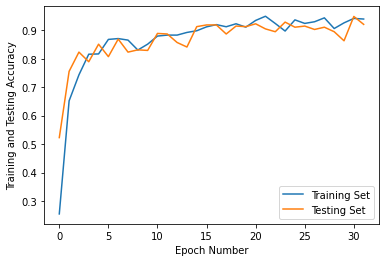

In [23]:
plt.xlabel('Epoch Number')
plt.ylabel('Training and Testing Accuracy')
plt.plot(model.history.history['categorical_accuracy'], label='Training Set')
plt.plot(model.history.history['val_categorical_accuracy'], label='Testing Set')
plt.legend()

### Saving the model

In [24]:
model_name = 'SignLanguage_recognition_inceptionv3.h5'
model.save(model_name, save_format='h5')

In [25]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Testing the model's accuracy on the testing dataset

In [17]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 503 images belonging to 36 classes.


In [30]:
predictions = model.predict(test_set)

16/16 [==============================] - 36s 2s/step


In [24]:
y_pred = [np.argmax(p) for p in predictions]
y_true = test_set.classes

print("False predictions are: ")
for i in range(len(y_pred)):
    if(y_true[i]!=y_pred[i]):
        print('index = {0:2d}, True class => {1}, {2} <= Predicted class'.format(i, label_names[y_true[i]], label_names[y_pred[i]]))

False predictions are: 
index = 22, True class => 1, D <= Predicted class
index = 26, True class => 1, Z <= Predicted class
index = 65, True class => 4, 5 <= Predicted class
index = 75, True class => 5, 4 <= Predicted class
index = 224, True class => G, Z <= Predicted class
index = 230, True class => G, Z <= Predicted class
index = 293, True class => K, Z <= Predicted class
index = 294, True class => K, F <= Predicted class
index = 298, True class => L, 8 <= Predicted class
index = 332, True class => N, M <= Predicted class
index = 334, True class => N, M <= Predicted class
index = 338, True class => O, 0 <= Predicted class
index = 342, True class => O, 0 <= Predicted class
index = 348, True class => O, 0 <= Predicted class
index = 390, True class => R, U <= Predicted class
index = 392, True class => S, T <= Predicted class
index = 403, True class => S, T <= Predicted class
index = 405, True class => S, N <= Predicted class
index = 415, True class => T, A <= Predicted class
index = 434

### Plotting the Confusion Matrix

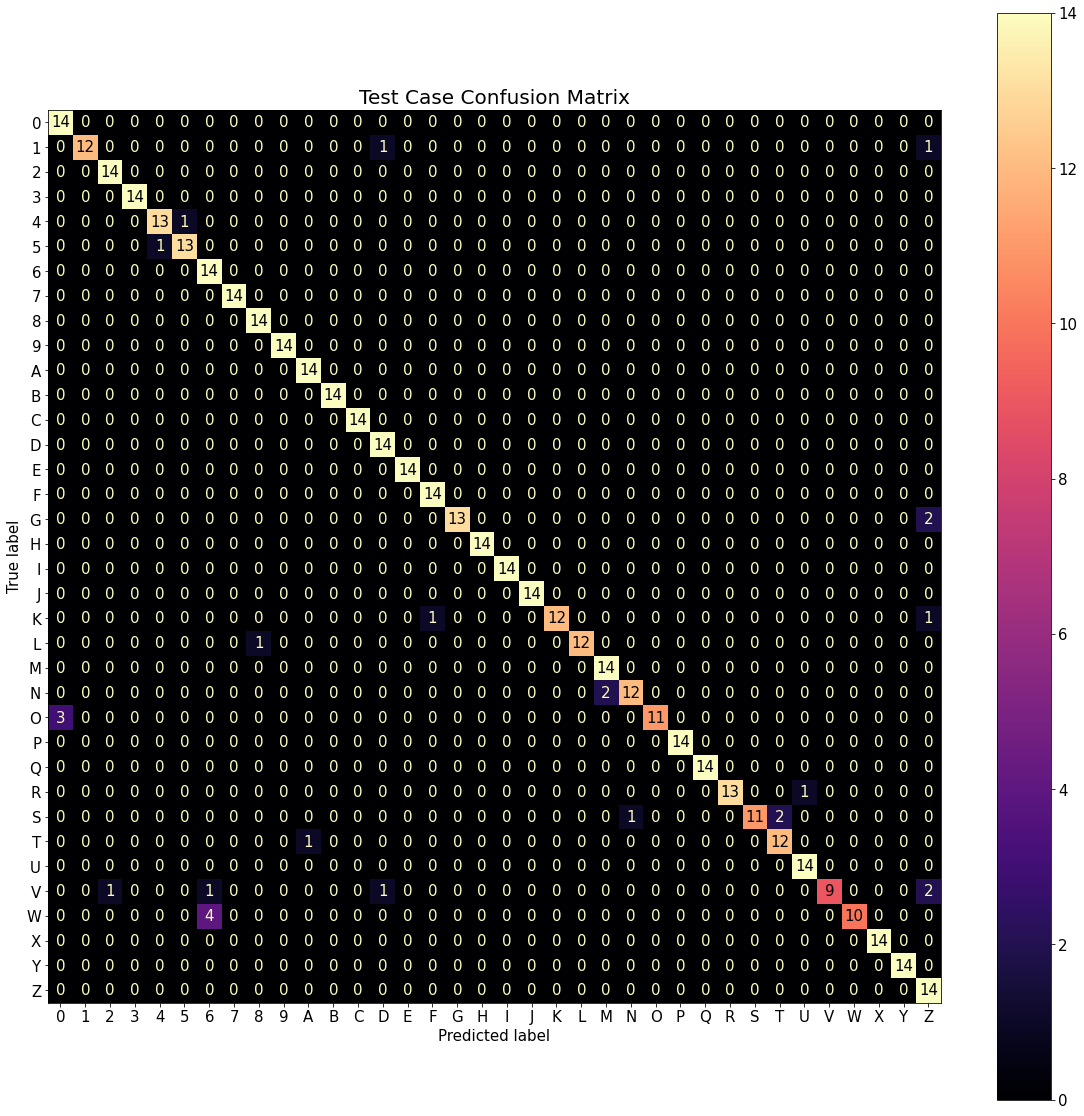

In [22]:
%matplotlib inline

cm = confusion_matrix(y_true, y_pred)
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['font.size'] = 15
display_cm = ConfusionMatrixDisplay(cm, display_labels=label_names)

display_cm.plot(cmap='magma')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Test Case Confusion Matrix', fontsize=20)

plt.show()

### Evaluating the model

In [23]:
model.evaluate(test_set)

16/16 [==============================] - 60s 4s/step - loss: 3.9102 - categorical_accuracy: 0.9264


[3.9102275371551514, 0.9264413714408875]

## Thus we have created a model that recognizes the hand signs based on the ASL with an accuracy of 92.64% and a loss of 3.91